# Aufgabe 34
## Teil 1
Implementation der Jacobi Iteration:

In [1]:
from numpy import array, diag
from numpy.linalg import norm

def jacobi_iteration(A,b,x0,tol):
    d=diag(A)
    B=-(A-diag(d))
    d=d**(-1)
    k=1
    x=d*(B@x0+b)
    x_old=x0
    q=0
    
    while norm(x-x_old)>tol:
        k=k+1
        x_old=x.copy()
        x=d*(B@x+b)

    return x,k

Wir testen an einem Beispiel mit starken Zeilensummenkriterium (d.h. wir müssen die $\infty$-Norm verwenden):

In [2]:
from numpy.random import randn
from numpy.linalg import solve

A=array([[3.,1,-1],[3,5,1],[2,1,-4]])
b=array([1.,2,3])
xtrue=solve(A,b)
x0=randn(3)*10
x,k = jacobi_iteration(A,b,x0,1e-4)

print('Startwert: {0},\nBerechnete Lösung: {1},\nWahre Lösung: {2},\nDifferenz: {3:1.3e},\nIterationen: {4}'.format(x0,x,xtrue,norm(A@x-b),k))

Startwert: [  2.69261466 -17.14628008   2.2221343 ],
Berechnete Lösung: [-0.07144352  0.57141562 -0.64283772],
Wahre Lösung: [-0.07142857  0.57142857 -0.64285714],
Differenz: 1.692e-04,
Iterationen: 24


# Teil 2
Implementation des Gauß-Seidel Verfahren:

In [3]:
from numpy import tril, triu

def gauss_seidel_iteration(A,b,x0,tol):
    k=1
    x=solve(tril(A),-triu(A,1)@x0+b)
    x_old=x0
    q=0
    
    while norm(x-x_old)>tol:
        k=k+1
        x_old=x.copy()
        x=solve(tril(A),-triu(A,1)@x+b)
        
    return x,k

Wir testen am selben Beispiel wie oben:

In [4]:
x,k = gauss_seidel_iteration(A,b,x0,1e-4)

print('Startwert: {0},\nBerechnete Lösung: {1},\nWahre Lösung: {2},\nDifferenz: {3:1.3e},\nIterationen: {4}'.format(x0,x,xtrue,norm(A@x-b),k))

Startwert: [  2.69261466 -17.14628008   2.2221343 ],
Berechnete Lösung: [-0.07139824  0.57140518 -0.64284782],
Wahre Lösung: [-0.07142857  0.57142857 -0.64285714],
Differenz: 6.062e-05,
Iterationen: 13


# Teil 3
Anwendung auf die Poissongleichung. Zunächst Import der benötigten Funktionen.

In [5]:
from numpy import eye

def tridiag(a,b,c,n):
    A=zeros([n,n]) 
    for iii in range(n):
        if iii==0:
            A[iii,iii]=b 
            A[iii,iii+1]=c
        elif iii==n-1:
            A[iii,iii]=b
            A[iii,iii-1]=a
        else:
            A[iii,iii]=b
            A[iii,iii-1]=a
            A[iii,iii+1]=c
    return A

def poisson2d_matrix(n):
    A=zeros([(n-1)**2,(n-1)**2]) # Hier speichern wie die Poissonmatrix rein
    B=tridiag(-1,4,-1,n-1) # Die Matrix entlang der Diagonalen
    C=-eye(n-1) # Die Matrix auf den Matrixnebendiagonalen
    # Jetzt bauen wir Matrix nach dem selben Prinzip zusammen, wie in tridiag:
    for iii in range(n-1): # für "blockweise" durchlaufen der Matrix
        ind=iii*(n-1) # Umrechnen von Blockindex zu Matrixindex
        A[ind:ind+(n-1),ind:ind+n-1]=B #Setzen des Diagonalblocks
        # Setzen der Nebendiagonalblöcke
        if iii==0:
            A[ind:ind+(n-1),ind+(n-1):ind+2*(n-1)]=C
        elif iii==n-2:
            A[ind:ind+(n-1),ind-(n-1):ind]=C
        else:
            A[ind:ind+(n-1),ind+(n-1):ind+2*(n-1)]=C
            A[ind:ind+(n-1),ind-(n-1):ind]=C
    return n**2*A

from numpy import array,zeros,ogrid,broadcast_arrays

def rechte_seite(n):
    rechteSeite=zeros([n-1,n-1])
    x,y=ogrid[1/n:1-1/n:(n-1)*1j,1/n:1-1/n:(n-1)*1j]
    x, y = broadcast_arrays(x, y)
    rechteSeite[(1/8<=x) & (x<=1/4) & (1/8<=y) & (y<=5/8)]=2
    rechteSeite[(1/8<=y) & (y<=1/4) & (1/8<=x) & (x<=5/8)]=2
    z=(x-2/3)**2+(y-2/3)**2
    rechteSeite[z<=1/16]=-1
    return rechteSeite.ravel()

In [6]:
N=[5,10,15,20,25,30,35,40]
k_jacobi=[]
k_gauss_seidel=[]

for n in N:
    A=poisson2d_matrix(n)
    b=rechte_seite(n)
    x0=zeros(b.shape)
    tol=0.001/(n**(1/2))
       
    x,k=jacobi_iteration(A,b,x0,tol)
    k_jacobi.append(k)
    
    x,k=gauss_seidel_iteration(A,b,x0,tol)
    k_gauss_seidel.append(k)

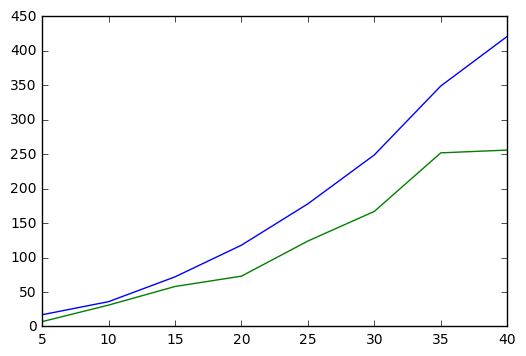

In [7]:
import matplotlib.pyplot as plt

plt.plot(N,k_jacobi,label='Jacobi-Verfahren')
plt.plot(N,k_gauss_seidel,label='Gauß-Seidel-Verfahren')
plt.show()